In [336]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from scipy import stats
import math
from PIL import Image

In [337]:
# Open data set
df2 = pd.read_csv("kc_house_data_clean.csv")
df2 = df2.drop(["Unnamed: 0"], axis = 1)
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Income,Renovated,year_sold,house_age_at_sale
0,164,221900.0,3,1.00,1180,5650,1.0,0,4,0,...,2014,66,47.5112,-122.257,1340,5650,113555.0,No,2014,0.0
1,52,205425.0,2,1.00,880,6780,1.0,0,4,2,...,2014,66,47.5009,-122.248,1190,6780,113555.0,No,2014,0.0
2,76,445000.0,3,2.25,2100,8201,1.0,0,0,0,...,2014,66,47.5091,-122.244,2660,8712,113555.0,No,2014,0.0
3,146,236000.0,3,1.00,1300,5898,1.0,0,4,0,...,2014,66,47.5053,-122.255,1320,7619,113555.0,NaN,2014,0.0
4,292,170000.0,2,1.00,860,5265,1.0,0,4,0,...,2015,66,47.5048,-122.272,1650,8775,113555.0,No,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,154,2720000.0,4,3.25,3990,18115,2.0,0,4,2,...,2014,24,47.6177,-122.229,3450,16087,7190.0,NaN,2014,0.0
21416,84,1950000.0,4,3.50,4065,18713,2.0,0,4,2,...,2014,24,47.6209,-122.237,3070,18713,7190.0,No,2014,0.0
21417,345,2250000.0,5,5.25,3410,8118,2.0,0,4,0,...,2015,24,47.6295,-122.236,3410,16236,7190.0,No,2015,0.0
21418,195,2900000.0,5,4.00,5190,14600,2.0,0,2,0,...,2014,24,47.6102,-122.225,3840,19250,7190.0,No,2014,0.0


In [338]:
# Clean "renovated column" by changing Nan's to No and converting to categorical codes, set up predictor and target variables

df2["Renovated"] = df2["Renovated"].fillna(value='No')

def convert_categorical(column_names):
    for column_name in column_names:
        df2[column_name] = pd.Categorical(df2[column_name])
        df2[column_name] = df2[column_name].cat.codes

convert_categorical(["Renovated"])

y = df2["price"]
X = df2.drop(columns=["price","Renovated"], axis=1)

In [339]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Income,Renovated,year_sold,house_age_at_sale
0,164,221900.0,3,1.00,1180,5650,1.0,0,4,0,...,2014,66,47.5112,-122.257,1340,5650,113555.0,0,2014,0.0
1,52,205425.0,2,1.00,880,6780,1.0,0,4,2,...,2014,66,47.5009,-122.248,1190,6780,113555.0,0,2014,0.0
2,76,445000.0,3,2.25,2100,8201,1.0,0,0,0,...,2014,66,47.5091,-122.244,2660,8712,113555.0,0,2014,0.0
3,146,236000.0,3,1.00,1300,5898,1.0,0,4,0,...,2014,66,47.5053,-122.255,1320,7619,113555.0,0,2014,0.0
4,292,170000.0,2,1.00,860,5265,1.0,0,4,0,...,2015,66,47.5048,-122.272,1650,8775,113555.0,0,2015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21415,154,2720000.0,4,3.25,3990,18115,2.0,0,4,2,...,2014,24,47.6177,-122.229,3450,16087,7190.0,0,2014,0.0
21416,84,1950000.0,4,3.50,4065,18713,2.0,0,4,2,...,2014,24,47.6209,-122.237,3070,18713,7190.0,0,2014,0.0
21417,345,2250000.0,5,5.25,3410,8118,2.0,0,4,0,...,2015,24,47.6295,-122.236,3410,16236,7190.0,0,2015,0.0
21418,195,2900000.0,5,4.00,5190,14600,2.0,0,2,0,...,2014,24,47.6102,-122.225,3840,19250,7190.0,0,2014,0.0


In [340]:
#Run baseline model to see initial performance
x_predictors = sm.add_constant(X)
base_model = sm.OLS(y, x_predictors).fit()
base_model.summary()

/Users/sallypants/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     2296.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:33   Log-Likelihood:            -2.9298e+05
No. Observations:               21420   AIC:                         5.860e+05
Df Residuals:                   21400   BIC:                         5.862e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.369e+08   1.17e+07    -11.651      0.000    -1.6e+08   -1.14e+08
date                 20.3711     24.617      0.828      0.408     -27.880      68.623
bedrooms            -3.9e+04   2076.909    -18.780      0.000   -4.31e+04   -3.49e+04
bathrooms            2.9e+04   3211.422      9.031      0.000    2.27e+04    3.53e+04
sqft_living         160.1982     18.960      8.449      0.000     123.035     197.362
sqft_lot              0.2064      0.050      4.112      0.000       0.108       0.305
floors             1.427e+04   3692.572      3.864      0.000    7028.575    2.15e+04
waterfront         7.131e+05   1.81e+04     39.385      0.000    6.78e+05    7.49e+05
view              -3.462e+04   1695.264    -20.425      0.000   -3.79e+04   -3.13e+04
condition          2.602e+04   1210.297     21.496      0.000    2.36e+04    2.84e+04
grade             -1.996e+04    679.214    -29.393      0.000   -2.13e+04   -1.86e+04
sqft_above           68.1039     18.978      3.589      0.000      30.905     105.303
sqft_basement        41.3452     18.805      2.199      0.028       4.486      78.205
yr_built           1.191e+04   2878.589      4.136      0.000    6263.745    1.75e+04
zipcode           -1627.6522     93.784    -17.355      0.000   -1811.476   -1443.829
lat                7.246e+05   1.11e+04     65.146      0.000    7.03e+05    7.46e+05
long              -4.487e+05   1.37e+04    -32.788      0.000   -4.76e+05   -4.22e+05
sqft_living15        58.2121      3.459     16.828      0.000      51.432      64.993
sqft_lot15           -0.5115      0.077     -6.640      0.000      -0.663      -0.361
Income               -0.3991      0.027    -14.783      0.000      -0.452      -0.346
year_sold          1.191e+04   2878.601      4.136      0.000    6263.869    1.75e+04
house_age_at_sale          0          0        nan        nan           0           0
==============================================================================
Omnibus:                    16429.114   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1261991.384
Skew:                           3.088   Prob(JB):                         0.00
Kurtosis:                      40.092   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [341]:
# An R-sqaured value of 0.671 is pretty good, but let's try to get it higher

In [342]:
# Apply recursive feature elimination to select the 18 most important features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=18)
selector = selector.fit(X, df2["price"])

pd.DataFrame(selector.support_,index=X.columns,columns=['Rank'])

,Rank
date,True
bedrooms,True
bathrooms,True
sqft_living,True
sqft_lot,False
floors,True
waterfront,True
view,True
condition,True
grade,True


In [343]:
# Drop the 3 false-ranked categories and rerun model
X = df2.drop(columns=["sqft_lot","sqft_lot15","house_age_at_sale","price"], axis=1)
x_predictors = sm.add_constant(X)
base_model = sm.OLS(y, x_predictors).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2464.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:33   Log-Likelihood:            -2.9286e+05
No. Observations:               21420   AIC:                         5.858e+05
Df Residuals:                   21401   BIC:                         5.859e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.371e+08   1.17e+07    -11.736      0.000    -1.6e+08   -1.14e+08
date             24.9095     24.484      1.017      0.309     -23.080      72.899
bedrooms      -3.786e+04   2057.284    -18.401      0.000   -4.19e+04   -3.38e+04
bathrooms      2.845e+04   3191.998      8.912      0.000    2.22e+04    3.47e+04
sqft_living     151.8753     18.854      8.055      0.000     114.920     188.830
floors         1.694e+04   3662.871      4.624      0.000    9759.144    2.41e+04
waterfront     6.939e+05    1.8e+04     38.476      0.000    6.59e+05    7.29e+05
view          -3.371e+04   1685.991    -19.996      0.000    -3.7e+04   -3.04e+04
condition      2.738e+04   1206.548     22.692      0.000     2.5e+04    2.97e+04
grade         -2.032e+04    675.593    -30.072      0.000   -2.16e+04    -1.9e+04
sqft_above       72.4697     18.873      3.840      0.000      35.477     109.463
sqft_basement    45.4020     18.701      2.428      0.015       8.746      82.058
yr_built       1.205e+04   2862.728      4.208      0.000    6434.073    1.77e+04
zipcode       -1654.8016     93.283    -17.740      0.000   -1837.643   -1471.961
lat            7.256e+05    1.1e+04     65.752      0.000    7.04e+05    7.47e+05
long          -4.451e+05   1.35e+04    -33.075      0.000   -4.71e+05   -4.19e+05
sqft_living15    59.9607      3.437     17.444      0.000      53.223      66.698
Income           -0.3749      0.027    -14.005      0.000      -0.427      -0.322
Renovated      1.331e+05   7949.579     16.747      0.000    1.18e+05    1.49e+05
year_sold      1.205e+04   2862.728      4.208      0.000    6434.073    1.77e+04
==============================================================================
Omnibus:                    16386.240   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1260683.127
Skew:                           3.074   Prob(JB):                         0.00
Kurtosis:                      40.077   Cond. No.                     2.31e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [344]:
#The model now has a slightly higher R-sqaured value of 0.675. Let's see if dropping a few more predictors will help even more.

In [345]:
# Apply recursive feature elimination to select the 15 most important features

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=15)
selector = selector.fit(X, df2["price"])

pd.DataFrame(selector.support_,index=X.columns,columns=['Rank'])

,Rank
date,False
bedrooms,True
bathrooms,True
sqft_living,True
floors,True
waterfront,True
view,True
condition,True
grade,True
sqft_above,False


In [346]:
# Drop additional false-ranked categories and rerun model
X = df2.drop(columns=["date","sqft_lot","sqft_above","sqft_basement","sqft_lot15", "Income","house_age_at_sale","price"], axis=1)
x_predictors = sm.add_constant(X)
base_model = sm.OLS(y, x_predictors).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     3115.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:05:34   Log-Likelihood:            -2.9298e+05
No. Observations:               21420   AIC:                         5.860e+05
Df Residuals:                   21405   BIC:                         5.861e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.369e+08   6.44e+06    -21.269      0.000    -1.5e+08   -1.24e+08
bedrooms       -3.94e+04   2066.420    -19.069      0.000   -4.35e+04   -3.54e+04
bathrooms      2.526e+04   3174.778      7.956      0.000     1.9e+04    3.15e+04
sqft_living     217.1982      3.313     65.566      0.000     210.705     223.691
floors         2.531e+04   3218.468      7.865      0.000     1.9e+04    3.16e+04
waterfront     6.992e+05   1.81e+04     38.568      0.000    6.64e+05    7.35e+05
view          -3.365e+04   1681.324    -20.014      0.000   -3.69e+04   -3.04e+04
condition      2.638e+04   1207.720     21.846      0.000     2.4e+04    2.88e+04
grade         -2.122e+04    673.045    -31.527      0.000   -2.25e+04   -1.99e+04
yr_built       1.446e+04   1542.838      9.372      0.000    1.14e+04    1.75e+04
zipcode       -1518.8549     93.083    -16.317      0.000   -1701.304   -1336.406
lat            7.192e+05    1.1e+04     65.130      0.000    6.98e+05    7.41e+05
long          -3.663e+05   1.25e+04    -29.293      0.000   -3.91e+05   -3.42e+05
sqft_living15    67.1861      3.392     19.806      0.000      60.537      73.835
Renovated      1.356e+05   7989.139     16.969      0.000     1.2e+05    1.51e+05
year_sold      1.446e+04   1542.838      9.372      0.000    1.14e+04    1.75e+04
==============================================================================
Omnibus:                    16485.858   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1263626.612
Skew:                           3.107   Prob(JB):                         0.00
Kurtosis:                      40.111   Cond. No.                     5.91e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [347]:
#Yikes! The R-sqaured value is going back down. Better stick with the 18 top-ranked features for now.
df2 = df2.drop(columns=["sqft_lot","sqft_lot15","house_age_at_sale"], axis=1)

In [348]:
#Let's check for variables that may affect each other (multicollinearity)
data_predictors = df2.drop(["price"], axis = 1)
abs(data_predictors.corr()) > 0.7

,date,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,Income,Renovated,year_sold
date,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False


In [349]:
#Return only the highly correlated pairs.
df3=data_predictors.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df3['pairs'] = list(zip(df3.level_0, df3.level_1))
df3.set_index(['pairs'], inplace = True)
df3.drop(columns=['level_1', 'level_0'], inplace = True)
df3.columns = ['cc']
df3.drop_duplicates(inplace=True)
df3[(df3.cc>.75) & (df3.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876533
"(year_sold, date)",0.845063
"(sqft_living15, sqft_living)",0.756186
"(sqft_living, bathrooms)",0.755522


In [350]:
#Looks like sqft_above, sqft_living, and sqft_living15 are highly correlated. 
#That make sense because they're each measures of square footage. 
#We'll keep sqft_living, which gives the total square footage in a house, and drop sqft_above since it's a 
#subset of total square footage as well as sqft_living15 because house sizes in a neighborhood are similar (and not possible to readily change)

#The relationship between date and year_sold isn't especially meaningful since we're just looking at the houses
#sold within a span of a year, so date can be dropped.

#The correlation between bathrooms and sqft_living makes sense; bigger homes typically have more bathrooms than smaller homes.
#In order to control for multicollinearity, we'll drop bathrooms. 

In [351]:
df2 = df2.drop(columns=["sqft_above","date","sqft_living15","bathrooms"], axis=1)

In [352]:
#see which remaining predictors correlate most strongly with price
df2.corr()

,price,bedrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,Income,Renovated,year_sold
price,1.000000,0.316910,0.701295,0.254972,0.264915,-0.304090,0.021207,-0.367481,0.321264,0.001385,-0.048845,0.306439,0.019826,-0.170781,0.117975,0.001385
bedrooms,0.316910,1.000000,0.594221,0.183570,-0.002132,-0.069198,0.006603,-0.064289,0.303429,-0.009662,-0.158622,-0.012974,0.137018,-0.062058,0.017924,-0.009662
sqft_living,0.701295,0.594221,1.000000,0.352868,0.104737,-0.227884,-0.082480,-0.317638,0.427998,-0.030793,-0.191522,0.050739,0.240212,-0.200702,0.050623,-0.030793
floors,0.254972,0.183570,0.352868,1.000000,0.020578,-0.012840,-0.289253,-0.047945,-0.242151,-0.024178,-0.038015,0.048900,0.124812,-0.034578,0.003063,-0.024178
waterfront,0.264915,-0.002132,0.104737,0.020578,1.000000,-0.228712,0.019439,-0.082011,0.083317,-0.005435,0.027487,-0.012267,-0.037883,-0.041406,0.074429,-0.005435
view,-0.304090,-0.069198,-0.227884,-0.012840,-0.228712,1.000000,-0.040830,0.100054,-0.224519,-0.005342,-0.070638,-0.012042,0.075136,0.075681,-0.062547,-0.005342
condition,0.021207,0.006603,-0.082480,-0.289253,0.019439,-0.040830,1.000000,0.024872,0.164820,-0.043634,0.001444,-0.019584,-0.116151,0.060082,-0.058824,-0.043634
grade,-0.367481,-0.064289,-0.317638,-0.047945,-0.082011,0.100054,0.024872,1.000000,-0.060298,0.004119,0.031466,-0.030602,-0.057050,0.111084,0.004408,0.004119
sqft_basement,0.321264,0.303429,0.427998,-0.242151,0.083317,-0.224519,0.164820,-0.060298,1.000000,-0.015257,0.056960,0.108524,-0.143459,-0.004023,0.065294,-0.015257
yr_built,0.001385,-0.009662,-0.030793,-0.024178,-0.005435,-0.005342,-0.043634,0.004119,-0.015257,1.000000,0.002353,-0.029555,-0.000690,0.005975,-0.020020,1.000000


In [353]:
#Looks like sqft_living, grade, view, bedrooms, floors, waterfront, and sqft_basement have the highest correlations with price.
high_corr = df2[['sqft_living', 'grade', 'view', 'bedrooms', 'floors', 'waterfront', 'sqft_basement']]

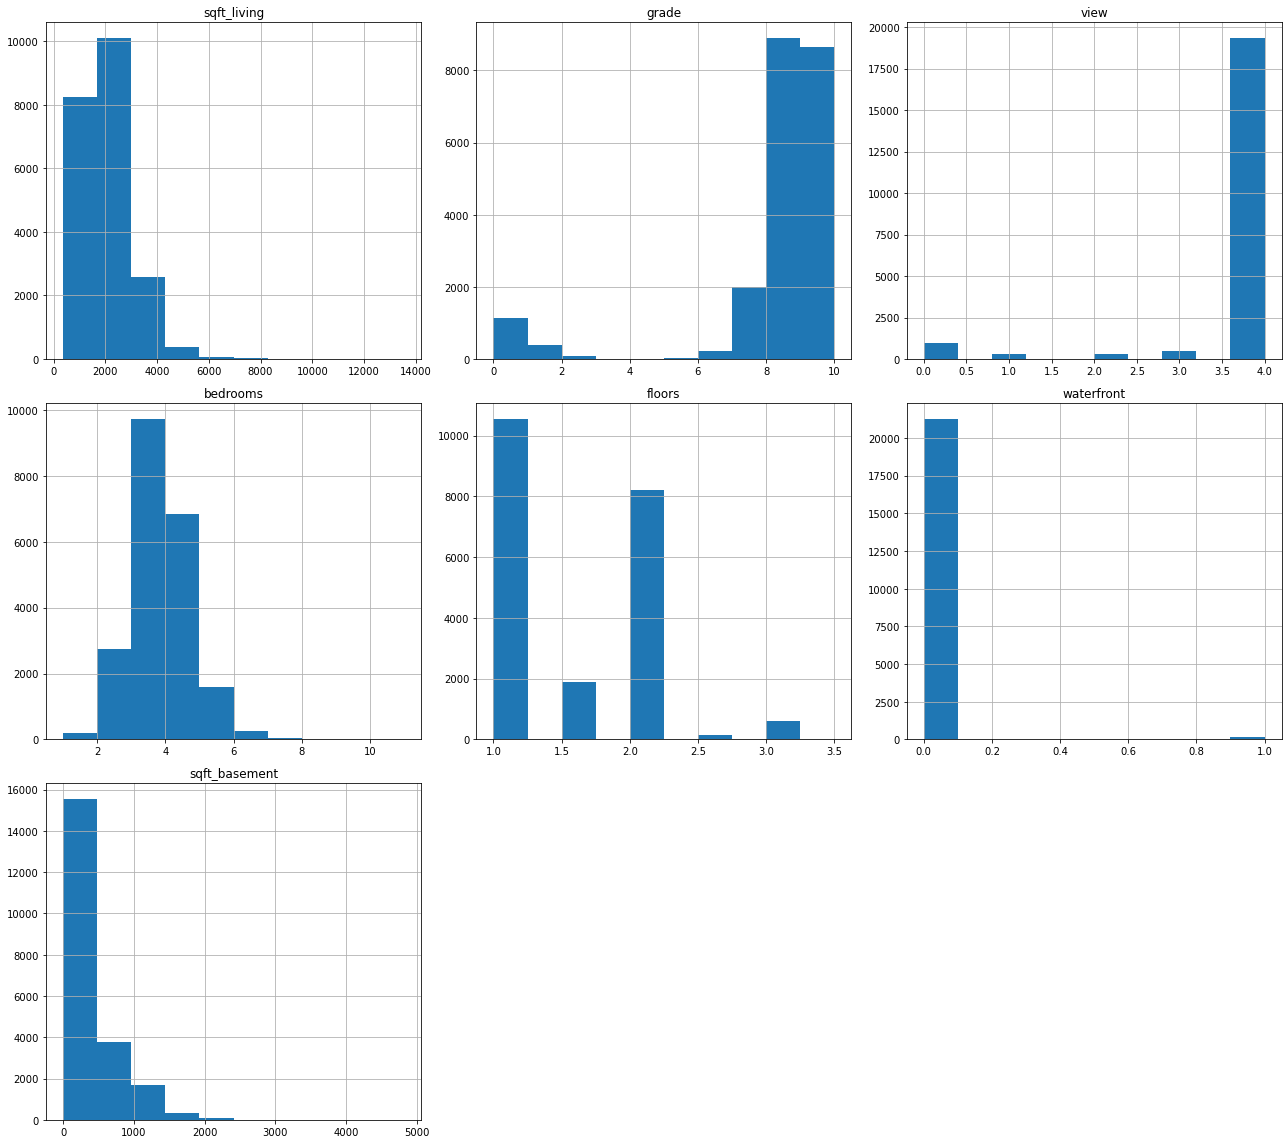

In [354]:
#Let's take a look and see if the predictors are normally distributed
high_corr.hist(figsize=(18,16));
plt.tight_layout()

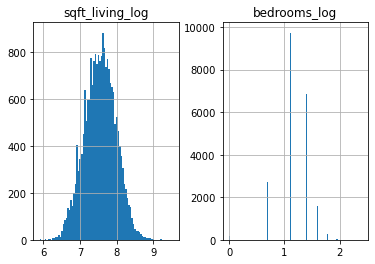

In [355]:
#Of the continuous variables that have not been label encoded, sqft_living and sqft_basement could benefit from log transformations.
#Bedrooms is closer to a normal distribution but could also be improved.

non_normal = df2[['sqft_living','bedrooms']]

log_names=[f'{column}_log' for column in non_normal.columns]
log=np.log(non_normal)
log.columns = log_names
log.hist(bins='auto')
fig.tight_layout();

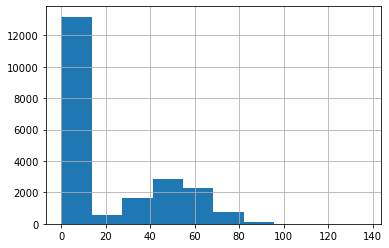

In [356]:
#That looks marginally better!
#Because sqft_basement contains 0 values, we'll use the Box-ox transformation
from scipy.special import boxcox1p
transformed=df2['sqft_basement'].apply(lambda x: boxcox1p(x,.5))
transformed.hist();

In [309]:
#Eh, not great due to the high quantity of 0 values. I'm going to choose not to use this variable because it is
#0-inflated and because we have another variable that captures the square footage amount.
high_corr = high_corr.drop(columns=["sqft_basement"], axis=1)

In [357]:
#Create a new data frame with log transformed variables and the remaining predictors 
high_corr = high_corr.drop(columns=["sqft_living","bedrooms"], axis=1)
df_to_standardize = pd.concat([log, high_corr], axis =1)

In [358]:
#Next, we'll standardize all the remaining variables
standard = preprocessing.StandardScaler()
standard_data = standard.fit_transform(df_to_standardize)

In [359]:
standard_data

array([[-1.12933005, -0.28144168,  0.07479911, ..., -0.91837451,
        -0.08284224, -0.64985289],
       [-1.8211272 , -1.71806132, -0.35822709, ..., -0.91837451,
        -0.08284224, -0.64985289],
       [ 0.2300383 , -0.28144168,  0.50782531, ..., -0.91837451,
        -0.08284224,  0.44104953],
       ...,
       [ 1.37327481,  1.52848503, -2.95638429, ...,  0.93324277,
        -0.08284224, -0.64985289],
       [ 2.36380415,  1.52848503, -2.95638429, ...,  0.93324277,
        -0.08284224, -0.64985289],
       [ 1.6224362 ,  0.73785618, -2.95638429, ...,  0.93324277,
        -0.08284224,  0.48650379]])

In [360]:
#Time to run the model again on our transformed data

x_transformed_predictors = sm.add_constant(standard_data)
transformed_model = sm.OLS(y, x_transformed_predictors).fit()
transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3157.
Date:                Thu, 06 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:09:05   Log-Likelihood:            -2.9729e+05
No. Observations:               21420   AIC:                         5.946e+05
Df Residuals:                   21412   BIC:                         5.947e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.419e+05   1761.983    307.529      0.000    5.38e+05    5.45e+05
x1          1.885e+05   2870.369     65.654      0.000    1.83e+05    1.94e+05
x2         -3.554e+04   2352.862    -15.105      0.000   -4.02e+04   -3.09e+04
x3         -8.588e+04   1817.448    -47.250      0.000   -8.94e+04   -8.23e+04
x4         -4.438e+04   1872.838    -23.699      0.000   -4.81e+04   -4.07e+04
x5          3.465e+04   2149.273     16.123      0.000    3.04e+04    3.89e+04
x6          6.114e+04   1817.366     33.641      0.000    5.76e+04    6.47e+04
x7          3.768e+04   2218.343     16.987      0.000    3.33e+04     4.2e+04
==============================================================================
Omnibus:                    17553.730   Durbin-Watson:                   1.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1549378.315
Skew:                           3.397   Prob(JB):                         0.00
Kurtosis:                      44.108   Cond. No.                         3.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Sad! After all that, our R-squared number dropped from the original score of .671 to .508.
#But maybe this model is more accurate. Let's check the assumptions of linear regression.

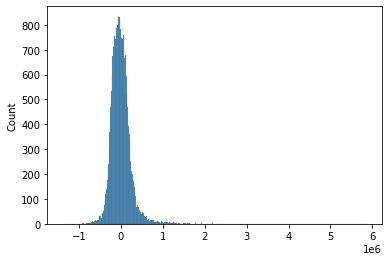

In [387]:
# Histogram of residuals looks relatively normally distributed
sns.histplot(transformed_model.resid);

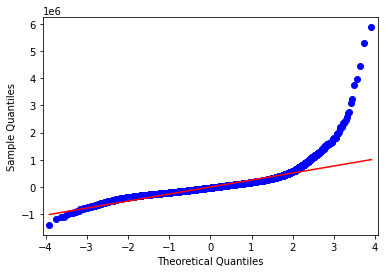

In [388]:
sm.qqplot(transformed_model.resid, line='s');

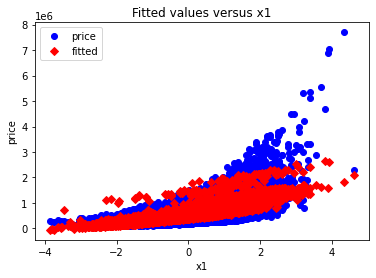

In [390]:
#fit plot to show predicted values of the predictors versus actual values of Y.
sm.graphics.plot_fit(transformed_model,1, vlines=False);

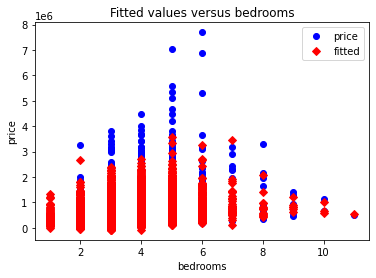

In [391]:
sm.graphics.plot_fit(base_model,1, vlines=False);

<ipython-input-386-0c1055d44ef1>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()


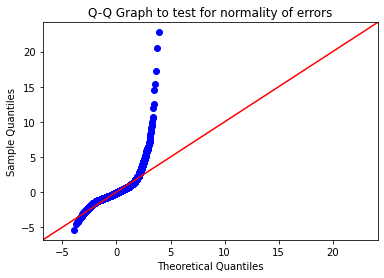

In [386]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
residual = transformed_model.resid
fig1=sm.graphics.qqplot(residual, dist=stats.norm, line='45', fit=True,)
plt.title("Q-Q Graph to test for normality of errors")
fig1.show()

In [385]:
sm.qqplot(transformed_model)
plt.show()

AttributeError: 'OLSResults' object has no attribute 'shape'

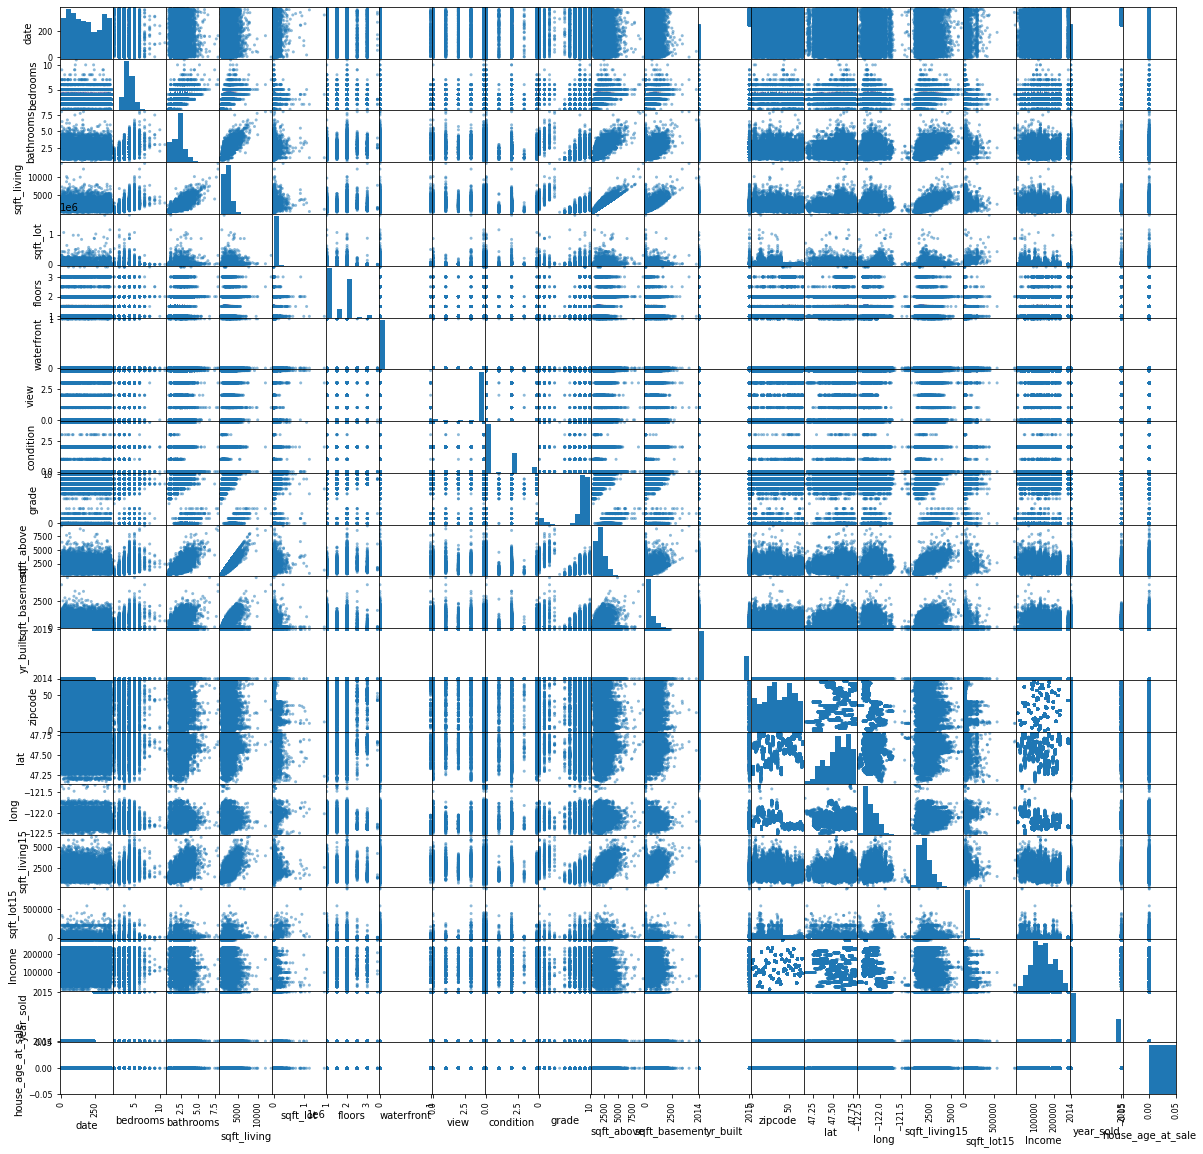

In [109]:
# Generate scatter matrix to look at scatterplots between predictors
pd.plotting.scatter_matrix(X, figsize  = [20, 20]);
plt.show()

In [ ]:
model = sm.OLS(y, sm.add_constant(X.astype(float)), missing = "drop").fit()
results = model.summary()
print(results)

Function to test linearity assumptions

In [4]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [14]:
#plot predictor against target to see if linearity assumption is met
sns.scatterplot(x=X, y=y)

ValueError: Shape of passed values is (21, 2), indices imply (21420, 2)

In [1]:
def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the target. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

In [5]:
linear_assumption(model, X, y)

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


ValueError: shapes (21420,21) and (22,) not aligned: 21 (dim 1) != 22 (dim 0)

In [15]:
def model_diagnostic(model, x, x_name, y):
    
    residuals = model.resid
    
    f = plt.figure()
    f, axes = plt.subplots(nrows = 1, ncols = 3, sharex=False, sharey = False, figsize=(65,20), squeeze=False)
    
    f.text(s="Model Diagnostic Summary", x=.40, y=1.15, fontsize=65, fontname='silom')
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=50, fontname='serif')
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=50, fontname='serif')
    
    f.text(s='Residuals Histogram', x=.45, y=.93, fontsize=55, fontname='serif')
    
    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])    
    plt.show;
    
    f.text(s='QQ Plot', x=.20, y=.93, fontsize=55, fontname='serif')
    
    axes[0][1].hist(residuals)
    plt.show;
    
    sns.residplot(x, y, ax=axes[0][2])
 
    f.text(s='Residuals vs {x}'.format(x=x_name), x=.73, y=.93, fontsize=55, fontname='serif')
    plt.tight_layout;
    plt.show;

    

/Users/sallypants/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: regplot inputs must be 1d

<Figure size 432x288 with 0 Axes>

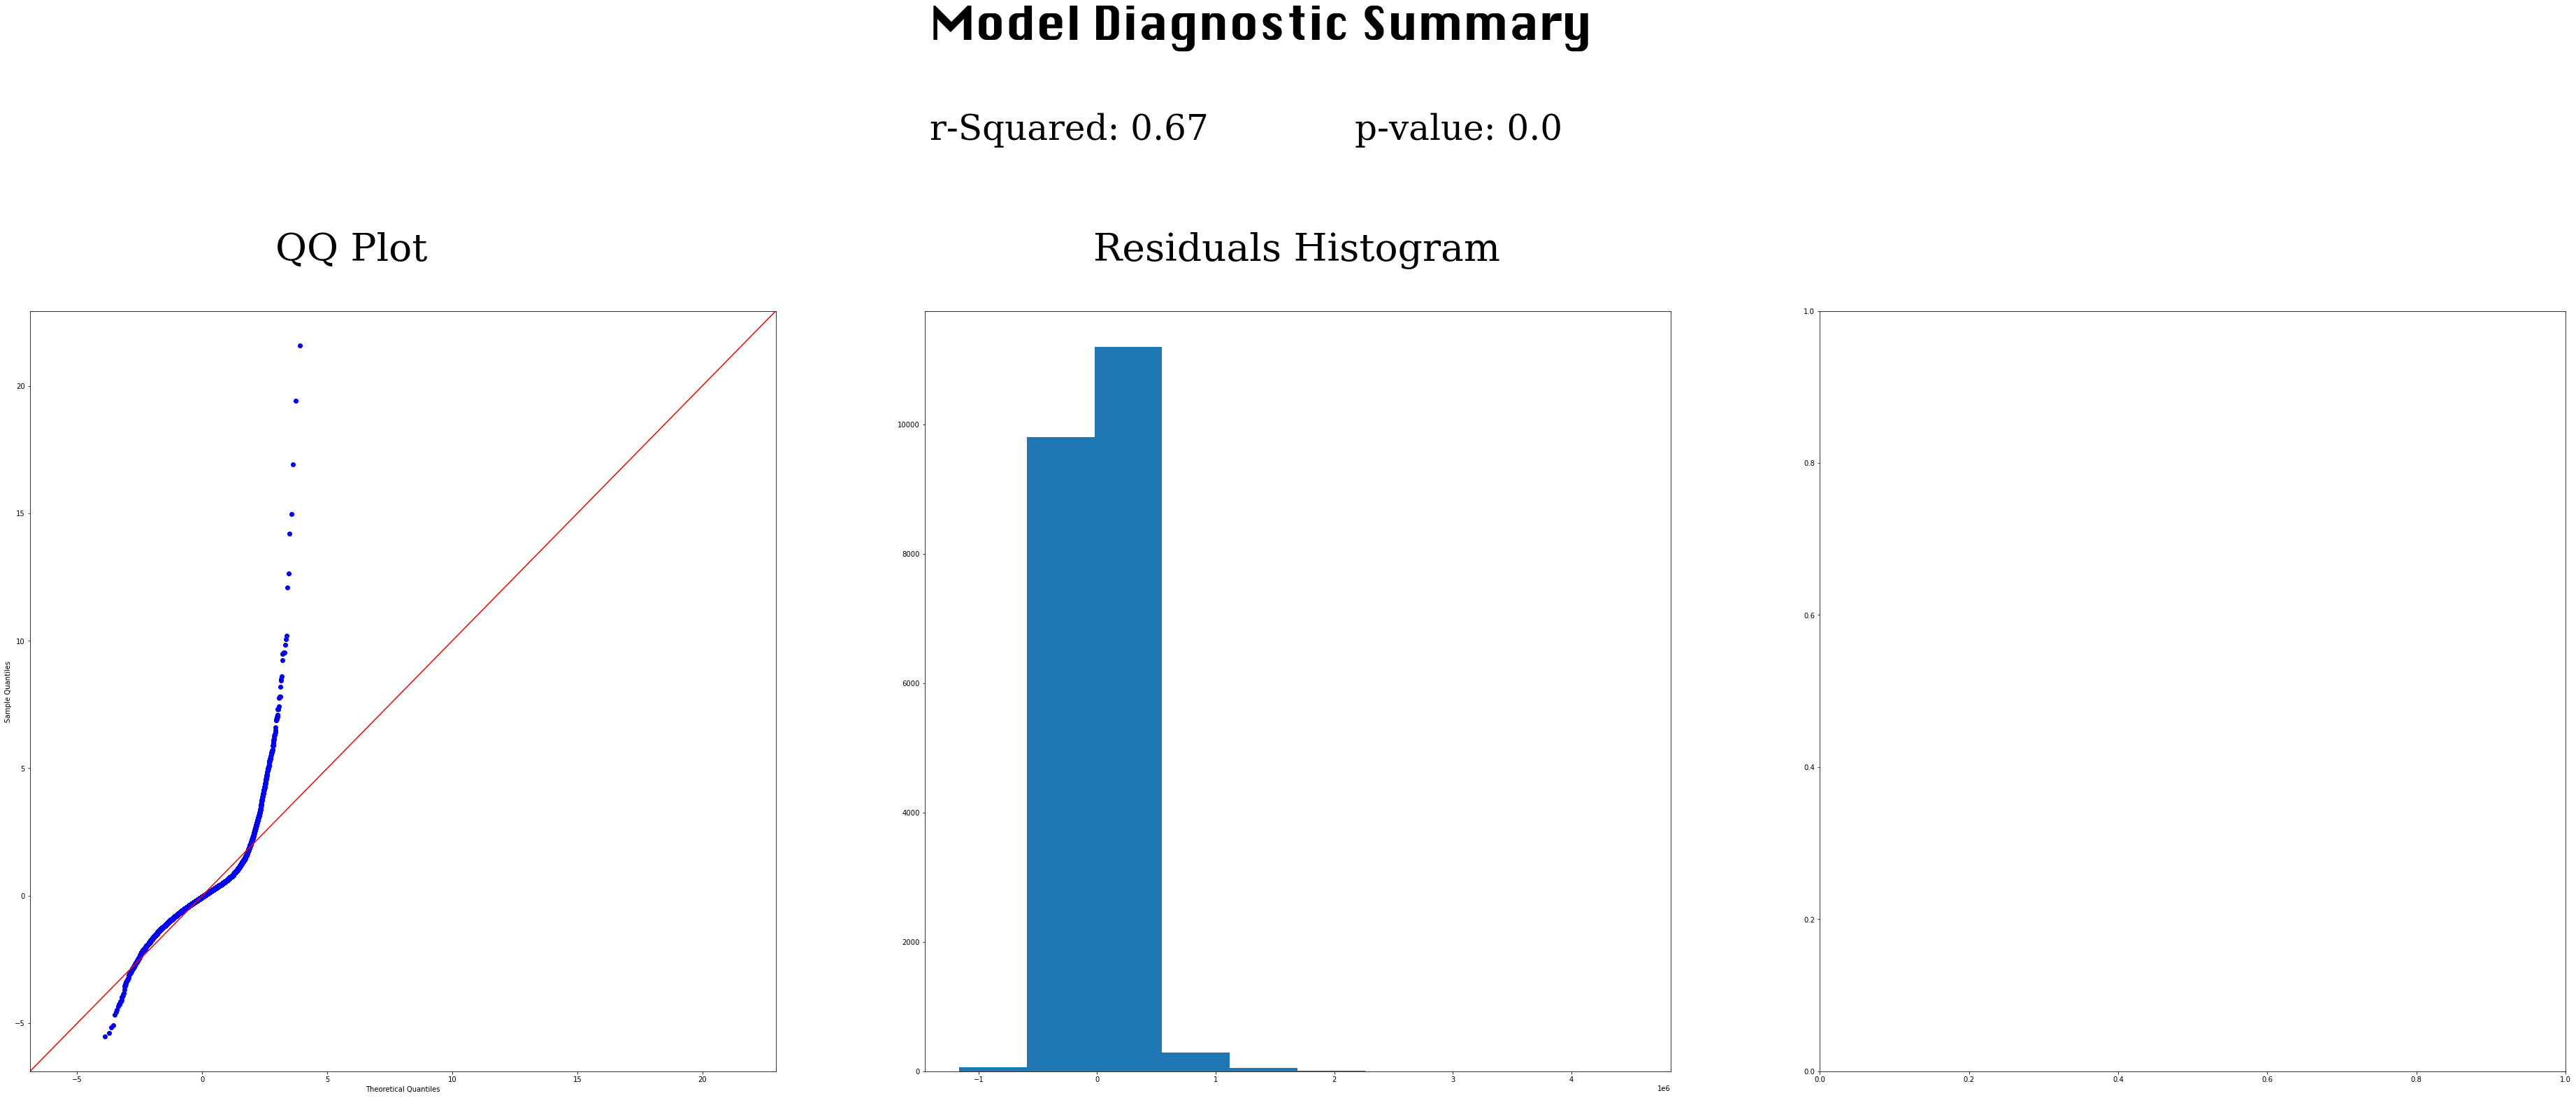

In [18]:
model_diagnostic(model, X, 'X variables', df2.price)

In [93]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
residuals = model.resid

def model_diagnostics(model, y):
#     fix,axes =plt.subplots(nrows=1, ncols=3)
#     residuals = model.resid
#     ax1=sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)    
#     plt.show;
#     axes[0][1].set_title('QQ Plot')
    fig1=sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True,)
    plt.title("Q-Q Graph to test for normality of errors")
    
    fig2=sm.graphics.plot_fit(model,1, vlines=False)
    plt.title("Fitted values versus Predictor");

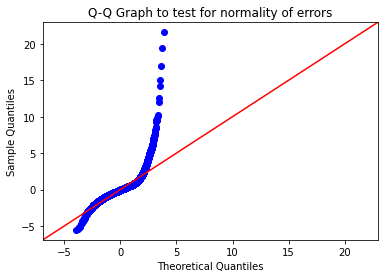

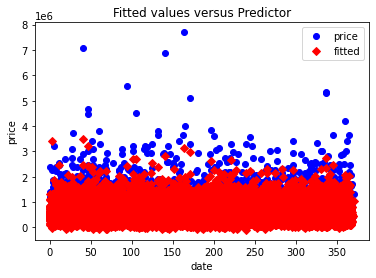

In [94]:
model_diagnostics(model, y)

In [97]:
fig = sm.graphics.plot_regress_exog(model, df2.price, fig=fig)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().